<a href="https://colab.research.google.com/github/Abhishek5317/Number-Prediction/blob/main/number_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(X_train, Y_train), (X_test, Y_test)=mnist.load_data()

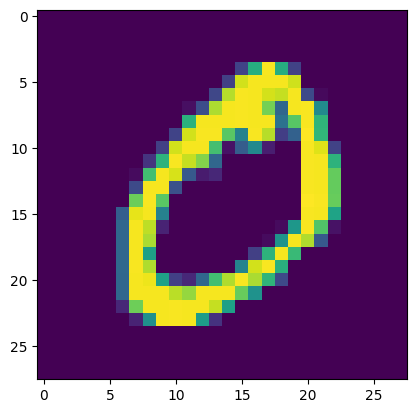

0


In [ ]:
plt.imshow(X_train[1])
plt.show()
print(Y_train[1])

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
#SETTING UP THE LAYERS OF NEURAL NETWORK
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)), # input layer
                        keras.layers.Dense(50,activation='relu'), #Hidden layer
                        keras.layers.Dense(50,activation='relu'), #Hiidden Layer
                        keras.layers.Dense(10,activation='sigmoid') # Output layer
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8416 - loss: 0.5359
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9538 - loss: 0.1529
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9659 - loss: 0.1084
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9723 - loss: 0.0859
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9787 - loss: 0.0687
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9818 - loss: 0.0567
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9862 - loss: 0.0466
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9877 - loss: 0.0405
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9892 - loss: 0.0359
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9897 - loss: 0.0315


In [ ]:
loss, accuracy =model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9682 - loss: 0.1250
0.9715999960899353


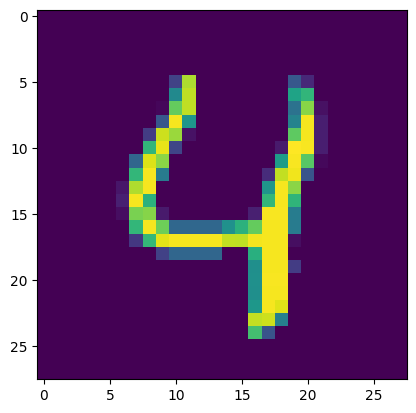

In [ ]:
plt.imshow(X_test[4])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred=model.predict(X_test)
print(Y_pred.shape)
print(Y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)
[2.24939708e-04 8.87582079e-04 3.88324112e-02 9.89962101e-01
 1.07042295e-04 3.13346856e-04 3.93093030e-10 9.99992967e-01
 4.13736135e-01 9.95033860e-01]


In [ ]:
# Converting the prediction to class labels
label_for_first_test_image=np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(8), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [ ]:
#confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 958    0    0    0    2    2    5    0    3   10]
 [   1 1120    2    3    0    0    4    1    4    0]
 [   7    4  990    8    5    0    3    4    8    3]
 [   0    0    6  975    1    7    0    2    7   12]
 [   0    1    1    0  973    0    3    0    1    3]
 [   2    0    0    8    3  864    8    0    5    2]
 [   3    3    2    1    2    3  943    0    1    0]
 [   0    2    9    7    8    1    0  982    2   17]
 [   6    0    5    5    5    3    3    2  940    5]
 [   1    3    0    2   19    5    1    2    5  971]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

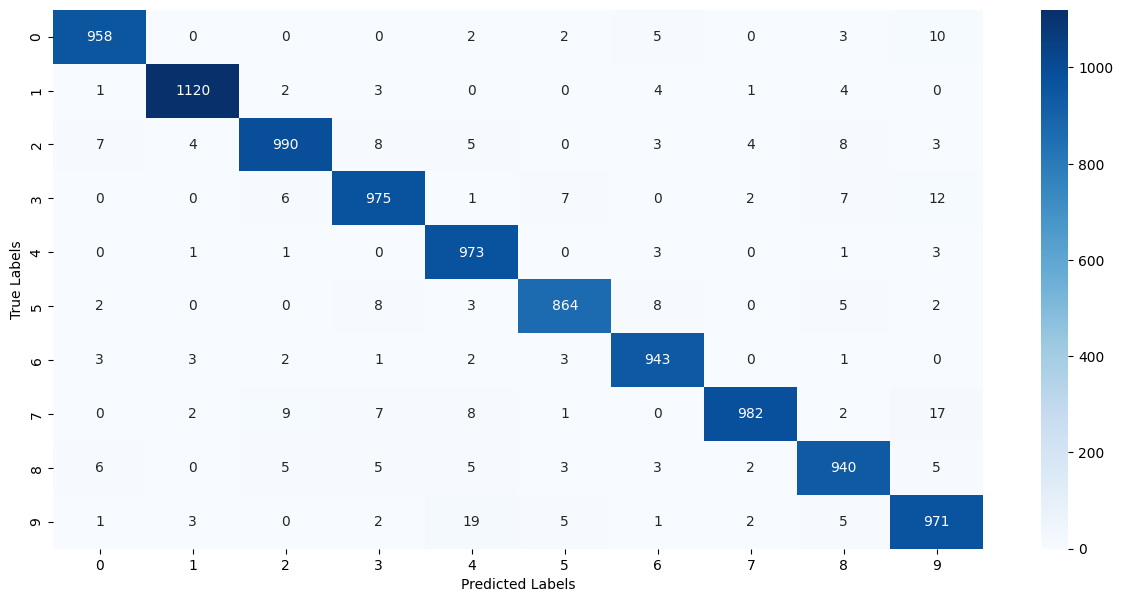

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

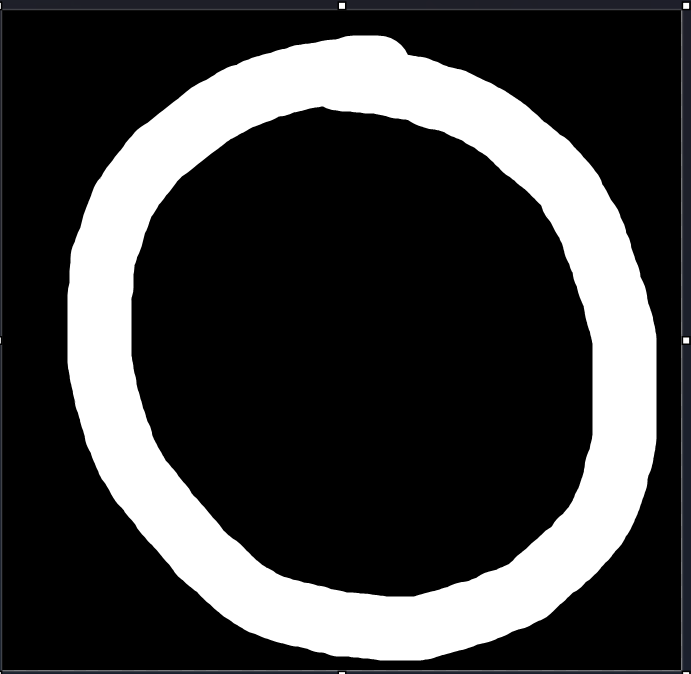

In [ ]:
input_image_path='/content/zero.png'

input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)

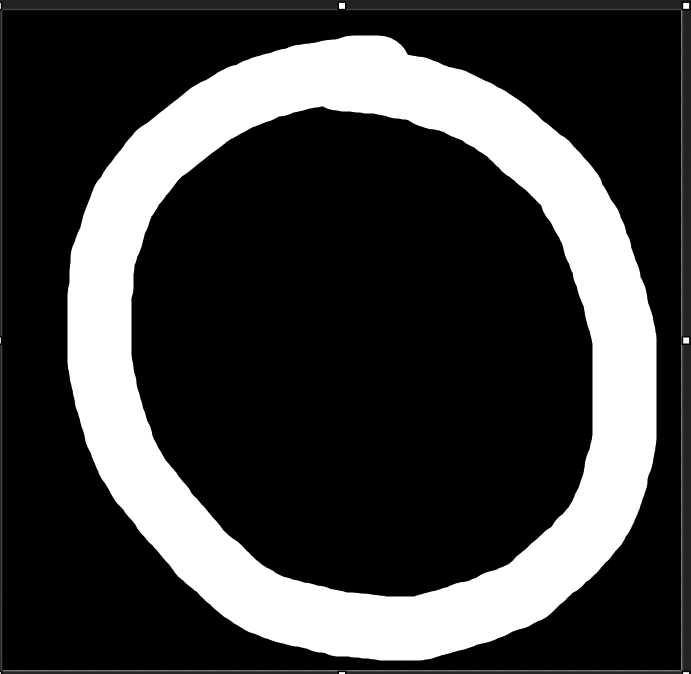

In [ ]:
greyscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
cv2_imshow(greyscale)

In [ ]:
input_image_resize=cv2.resize(greyscale,(28,28))
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize= input_image_resize/255

In [ ]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [ ]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[5.8263226e-06 1.2159347e-04 9.9999952e-01 9.9940395e-01 9.1781512e-18
  1.9541611e-01 5.9184572e-07 2.0140335e-03 7.4564032e-03 2.0495379e-09]]


In [ ]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

2


Path of the Image: /content/Screenshot 2025-04-21 054936.png


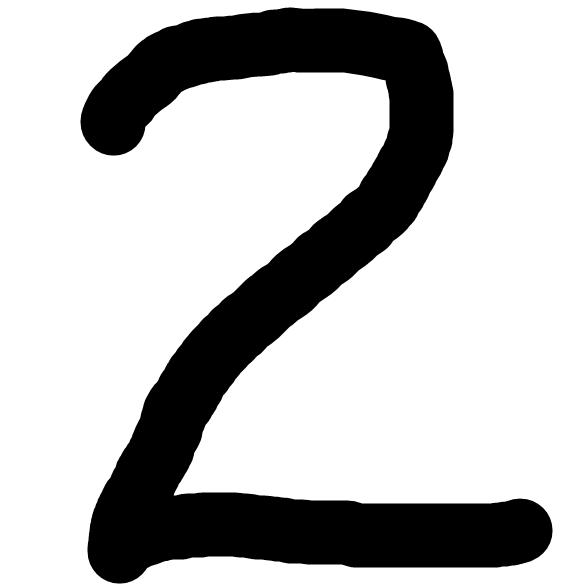

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

**************************************************
     MODEL PREDICTED VALUE: 2
**************************************************



In [ ]:
input_image_path=input('Path of the Image: ')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

greyscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(greyscale,(28,28))

image_image_resize=input_image_resize/255

image_reshaped=np.reshape(input_image_resize,[1,28,28])

input_prediction=model.predict(image_reshaped)

input_pred_label=np.argmax(input_prediction)

print('\n' + '*'*50)
print('     MODEL PREDICTED VALUE:', input_pred_label)
print('*'*50 + '\n')



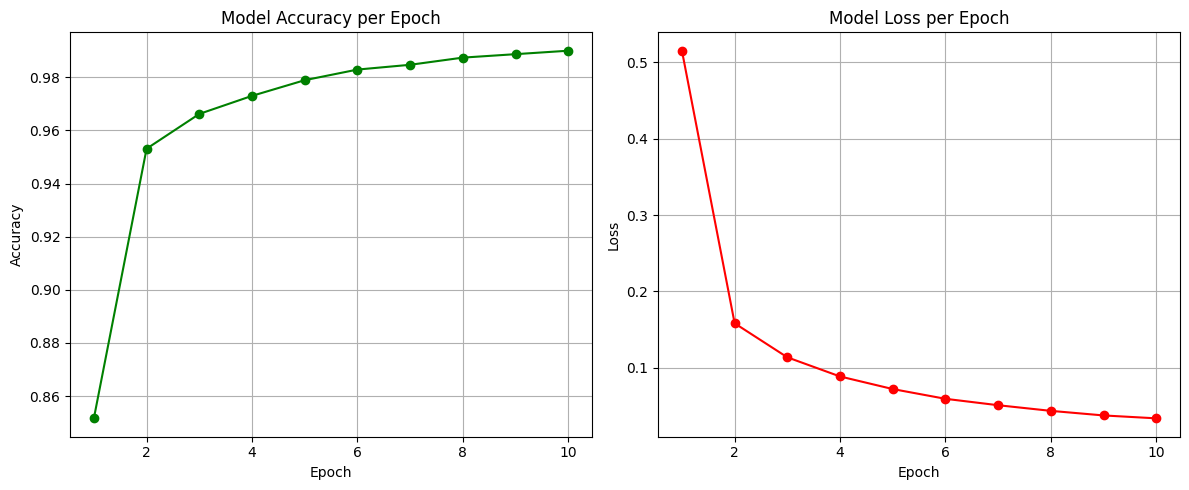

In [ ]:
import matplotlib.pyplot as plt

# Data from the image
epochs = list(range(1, 11))
accuracy = [0.8516, 0.9531, 0.9662, 0.9730, 0.9789, 0.9829, 0.9847, 0.9874, 0.9887, 0.9900]
loss = [0.5154, 0.1580, 0.1134, 0.0883, 0.0718, 0.0590, 0.0506, 0.0432, 0.0372, 0.0334]

# Plotting Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='green')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, marker='o', linestyle='-', color='red')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()
